In [1]:
import os
import re
import ROOT
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

Welcome to JupyROOT 6.28/11


In [2]:
def gaussian(x, mu, sig):
    return (1/(sig*np.sqrt(2.*np.pi)))*np.exp(-(x-mu)**2/(2*sig**2))

In [3]:
fname = "/pbs/home/g/gdiazlop/Software/WCSimFQTuningTools/Time/fiTQun/fitted_timepdf.root"
f = uproot.open(fname)

htpdfinfo, _ = f["htpdfinfo"].to_numpy()
npars_gauss = int(htpdfinfo[0])
npars_pars  = int(htpdfinfo[3])

hmean , pbins, trueqbins = f["mean"] .to_numpy()
hsigma, pbins, trueqbins = f["sigma"].to_numpy()

H, tresbins, trueqbins, pbins = f["htimepdf_direct"] .to_numpy()

momenta = (pbins[1:] + pbins[:-1])/2.
trueqs  = (trueqbins[1:] + trueqbins[:-1])/2.
tress   = (tresbins[1:] + tresbins[:-1])/2.

In [4]:
# choose a random momentum and read mean values
p = np.random.choice(momenta)
print("p = ", p)

pi = int(np.digitize(p, pbins) - 1)
means  = hmean [pi]
sigmas = hsigma[pi]

p =  490.5107345


### Gaussian fits

Nentries: 445.0
-1.2188677726131576 0.7481179265252043


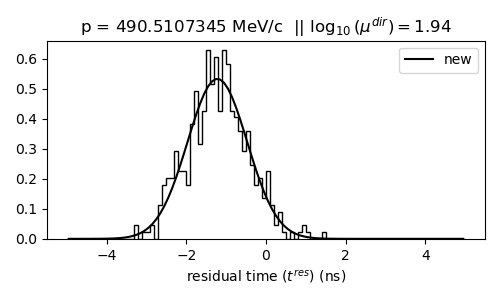

In [5]:
# choose random trueq
trueq = np.random.choice(trueqs)

# projection in the 2D histogram
tqi = np.digitize(trueq, trueqbins)-1
proj = H[:, tqi, pi]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))

mu  = means [tqi]
sig = sigmas[tqi]

print("Nentries:", proj.sum())
print(mu, sig)

# plot
plt.figure(figsize=[5, 3])

plt.title(f"p = {p} MeV/c  || " + r"$\log_{10}(\mu^{dir})=$" + f"{round(trueq, 3)}")

plt.stairs(proj/norm, tresbins, color="k")
plt.plot(tress, gaussian(tress,  mu,  sig), color="k", label="new")
plt.xlabel(r"residual time ($t^{res}$) (ns)")

plt.legend()
plt.tight_layout()

### Polynomial fits to Gaussian parameters $\mu$ and $\sigma$

In [6]:
# get params
mean_pars  = []
sigma_pars = []
for i in range(npars_gauss):
    _, pars_ = f[f"gtcmnpar_{i}"].values()
    mean_pars.append(pars_[pi])
    _, pars_ = f[f"gtcsgpar_{i}"].values()
    sigma_pars.append(pars_[pi])
mean_pars  = np.array(mean_pars)
sigma_pars = np.array(sigma_pars)

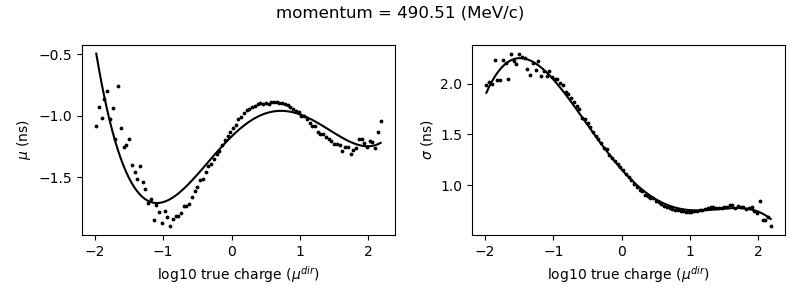

In [7]:
plt.figure(figsize=[8, 3])
plt.suptitle(f"momentum = {round(p, 2)} (MeV/c)")

# mean
plt.subplot(121)
sel = ~np.isnan(means)
plt.scatter(trueqs[sel], means[sel], s=3, color="k")
poly = np.poly1d(np.flip(mean_pars))
plt.plot(trueqs[sel], poly(trueqs[sel]), color="k")
plt.xlabel(r"log10 true charge ($\mu^{dir}$)")
plt.ylabel(r"$\mu$ (ns)")

plt.subplot(122)
sel = ~np.isnan(sigmas)
plt.scatter(trueqs[sel], sigmas[sel], s=3, color="k")
poly = np.poly1d(np.flip(sigma_pars))
plt.plot(trueqs[sel], poly(trueqs[sel]), color="k")
plt.xlabel(r"log10 true charge ($\mu^{dir}$)")
plt.ylabel(r"$\sigma$ (ns)")

plt.tight_layout()

### Polynomial fits of parameters

In [8]:
parmn, gaussbins, parsbins = f["htpdfparmn"].to_numpy()
parsg, gaussbins, parsbins = f["htpdfparsg"].to_numpy()

Parameter index:  0


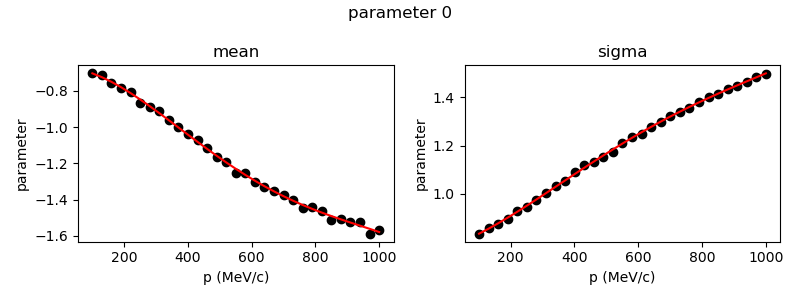

In [13]:
# choose random parameter index
i = np.random.randint(npars_gauss)
print("Parameter index: ", i)

# read parameter vs momenta
momenta, mean_pars  = f[f"gtcmnpar_{i}"].values()
momenta, sigma_pars = f[f"gtcsgpar_{i}"].values()

plt.figure(figsize=[8, 3])
plt.suptitle(f"parameter {i}")

plt.subplot(121)
plt.title("mean")
plt.scatter(momenta, mean_pars, color="k")
pol = np.poly1d(np.flip(parmn[i, :]))
plt.plot(momenta, pol(momenta), color="r")
plt.xlabel("p (MeV/c)")
plt.ylabel("parameter")

plt.subplot(122)
plt.title("sigma")
plt.scatter(momenta, sigma_pars, color="k")
pol = np.poly1d(np.flip(parsg[i, :]))
plt.plot(momenta, pol(momenta), color="r")
plt.xlabel("p (MeV/c)")
plt.ylabel("parameter")

plt.tight_layout()